# Advance Regression Technique to Predict Housing Price For Sale

# Advanced Regression Models To predict Housing Prices

In [10]:
!pip install lightgbm
!pip install mlxtend
!pip install xgboost

In [2]:
# Importing Important Libraries

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Machine Learning Libraries With scikit Learn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

#for Statistics
import scipy
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Reading The dataset

In [5]:

hp_train = pd.read_csv('./train.csv')
hp_test = pd.read_csv('./test.csv')
hp_train.shape, hp_test.shape



((1460, 81), (1459, 80))

In [6]:
hp_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
hp_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [8]:
# Finding Target Column
hp_train.columns.difference(hp_test.columns)

Index(['SalePrice'], dtype='object')

### As we found the Target Variable As SalePrice We ll try and check the distribution of SalePrice

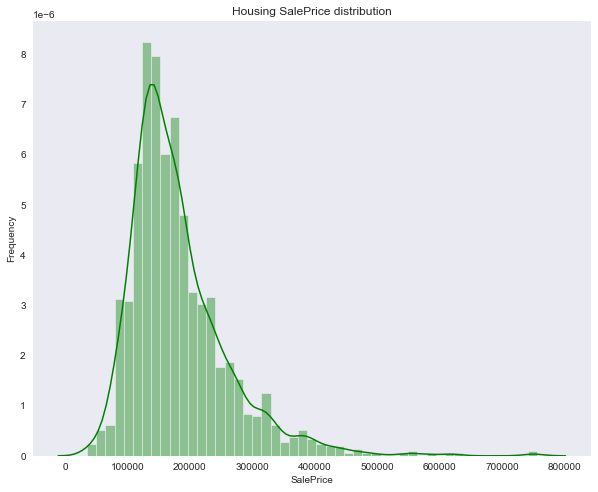

In [20]:

# Checking The Distribution of Train DataSet
sns.set_style("dark")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 8))
sns.distplot(hp_train['SalePrice'], color="green");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="Housing SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

# Let's Check The Datatypes of all Columns of Train Dataset

In [11]:
hp_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [12]:
# exploring datatype and unique values for each column/feature
list(zip(hp_train.columns,hp_train.dtypes,hp_train.nunique(dropna=False)))

[('Id', dtype('int64'), 1460),
 ('MSSubClass', dtype('int64'), 15),
 ('MSZoning', dtype('O'), 5),
 ('LotFrontage', dtype('float64'), 111),
 ('LotArea', dtype('int64'), 1073),
 ('Street', dtype('O'), 2),
 ('Alley', dtype('O'), 3),
 ('LotShape', dtype('O'), 4),
 ('LandContour', dtype('O'), 4),
 ('Utilities', dtype('O'), 2),
 ('LotConfig', dtype('O'), 5),
 ('LandSlope', dtype('O'), 3),
 ('Neighborhood', dtype('O'), 25),
 ('Condition1', dtype('O'), 9),
 ('Condition2', dtype('O'), 8),
 ('BldgType', dtype('O'), 5),
 ('HouseStyle', dtype('O'), 8),
 ('OverallQual', dtype('int64'), 10),
 ('OverallCond', dtype('int64'), 9),
 ('YearBuilt', dtype('int64'), 112),
 ('YearRemodAdd', dtype('int64'), 61),
 ('RoofStyle', dtype('O'), 6),
 ('RoofMatl', dtype('O'), 8),
 ('Exterior1st', dtype('O'), 15),
 ('Exterior2nd', dtype('O'), 16),
 ('MasVnrType', dtype('O'), 5),
 ('MasVnrArea', dtype('float64'), 328),
 ('ExterQual', dtype('O'), 4),
 ('ExterCond', dtype('O'), 5),
 ('Foundation', dtype('O'), 6),
 ('Bsmt

## Visualization of the Data

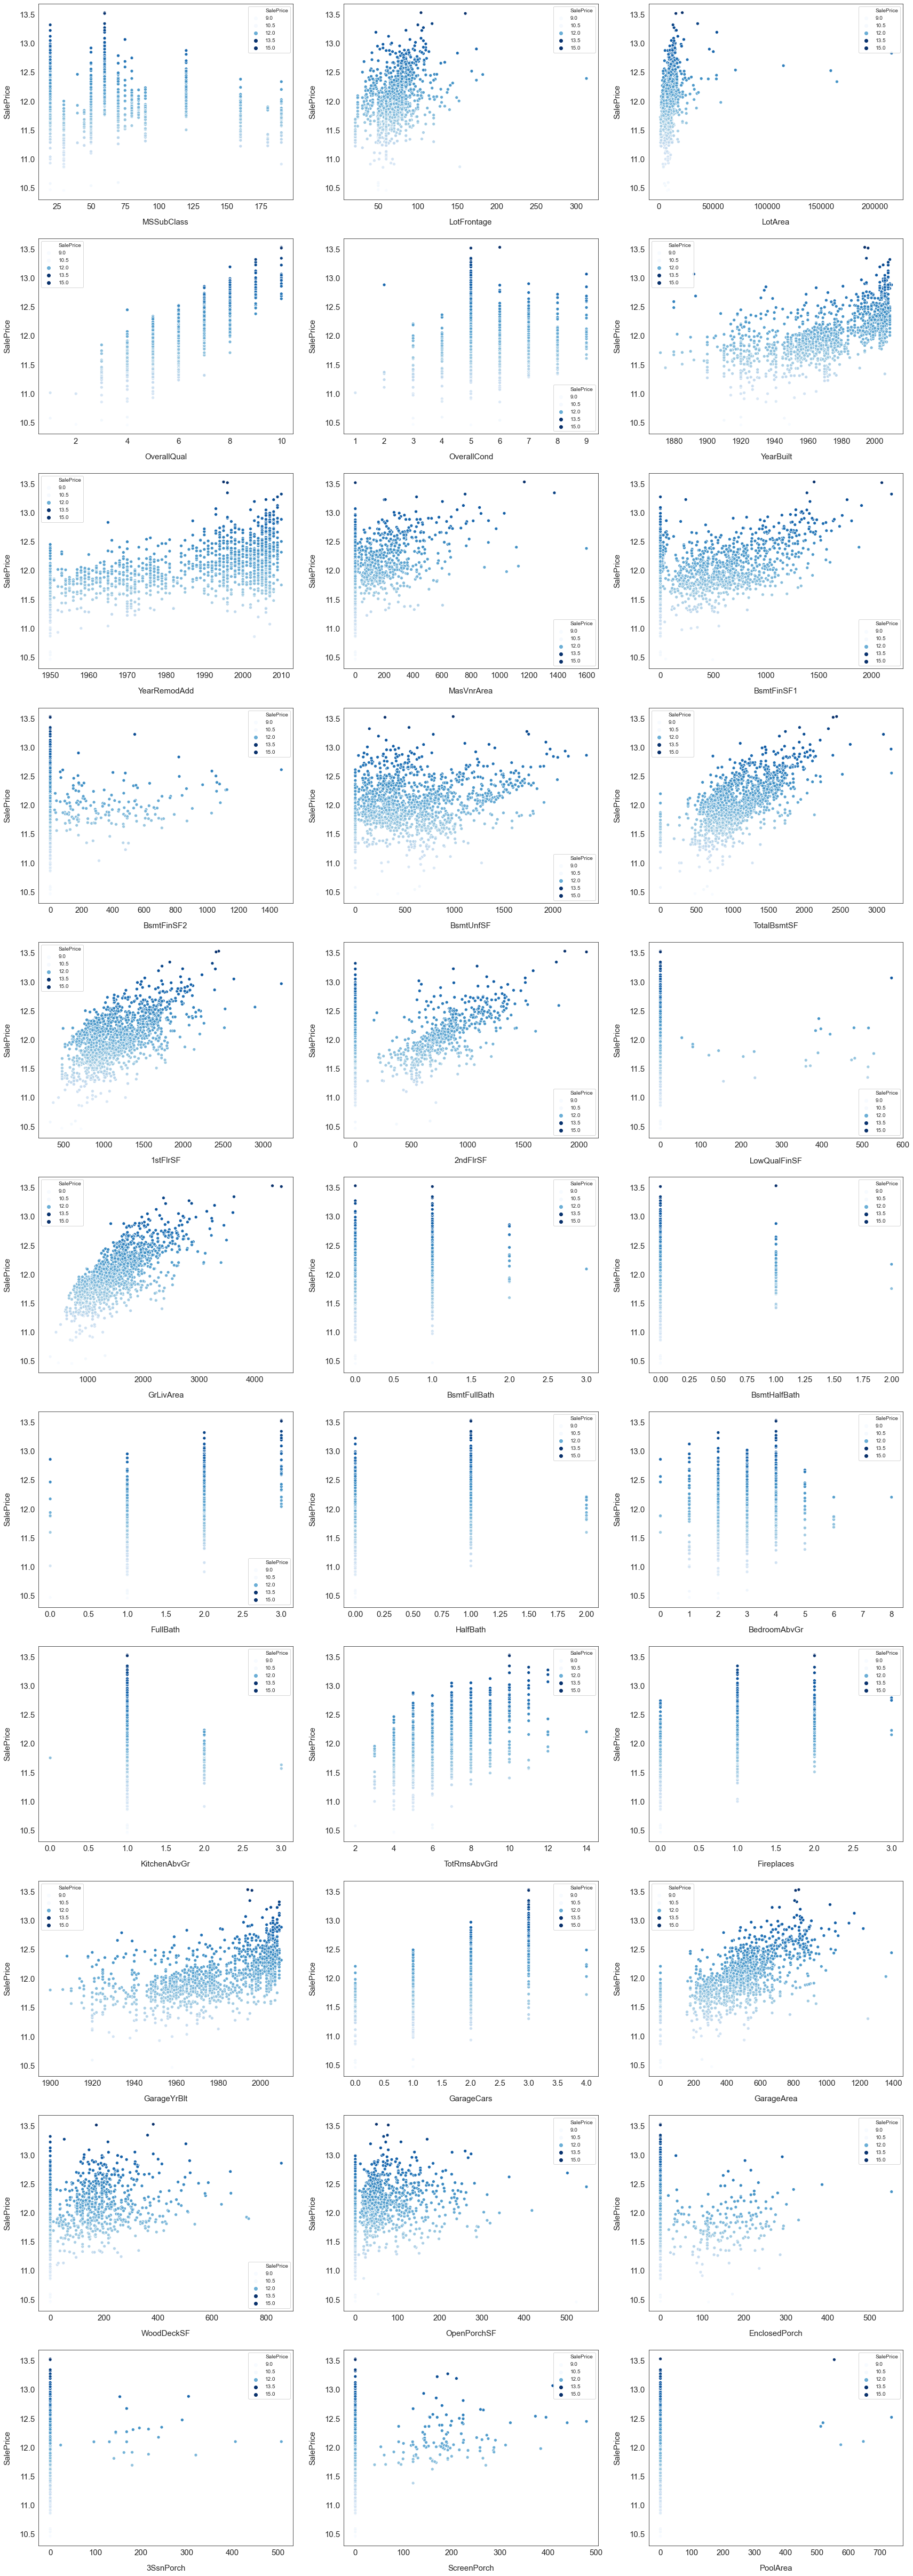

In [57]:
# Finding numeric features
numeric_dtypes = ['int64','float64']
numeric = []
for i in hp_train.columns:
    if hp_train[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(hp_train[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=hp_train)
        
    plt.xlabel('{}'.format(feature), size=15, labelpad=15)
    plt.ylabel('SalePrice', size=15, labelpad=15)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=15)
        plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

### Plotting the Heatmap to see the accuracy of the dataset

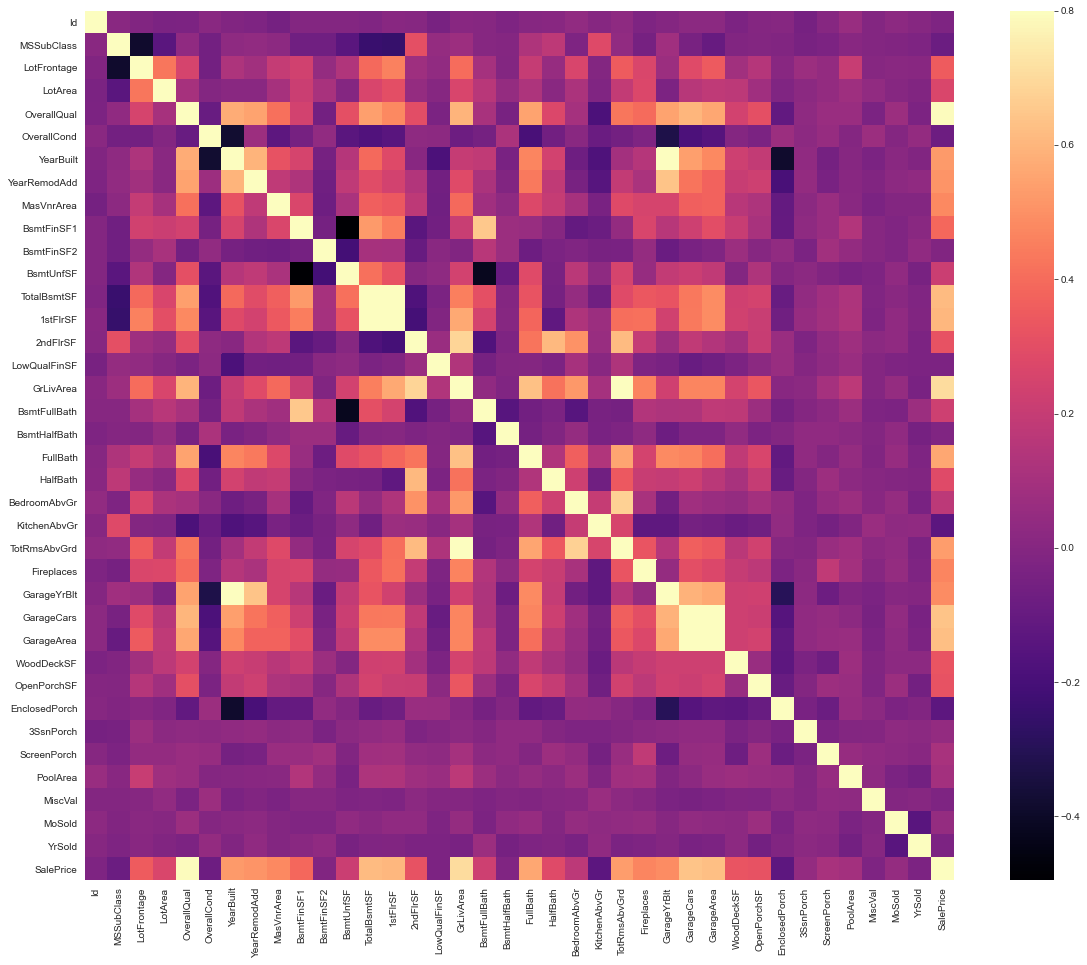

In [14]:
corr = hp_train.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(corr, vmax=0.8, cmap="magma", square=True)

### Let's Visualize how SalePrice is relating to some of the features in the Training dataset

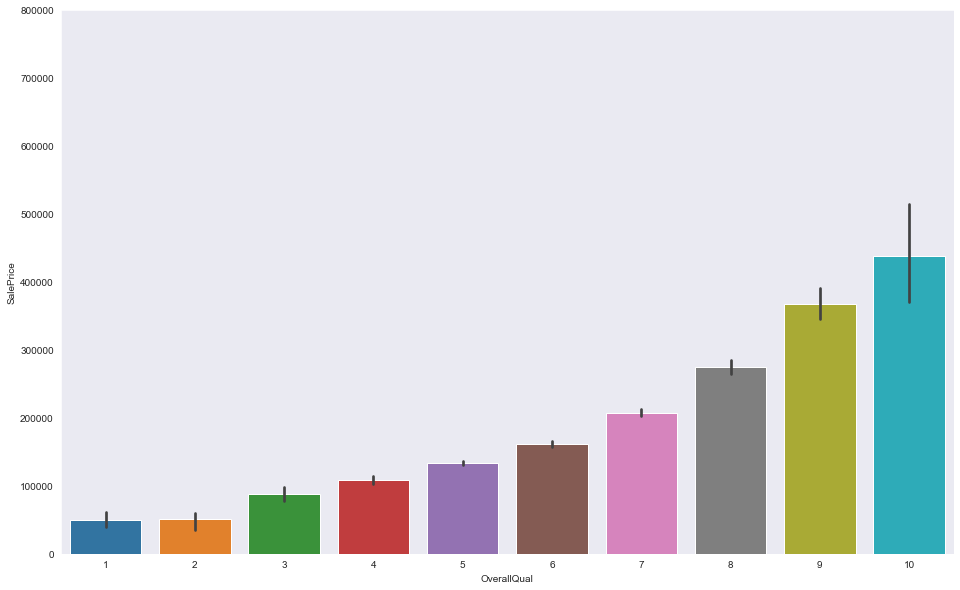

In [15]:
# OverallQual to the SalePrice
data = pd.concat([hp_train['SalePrice'], hp_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.barplot( x=hp_train['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

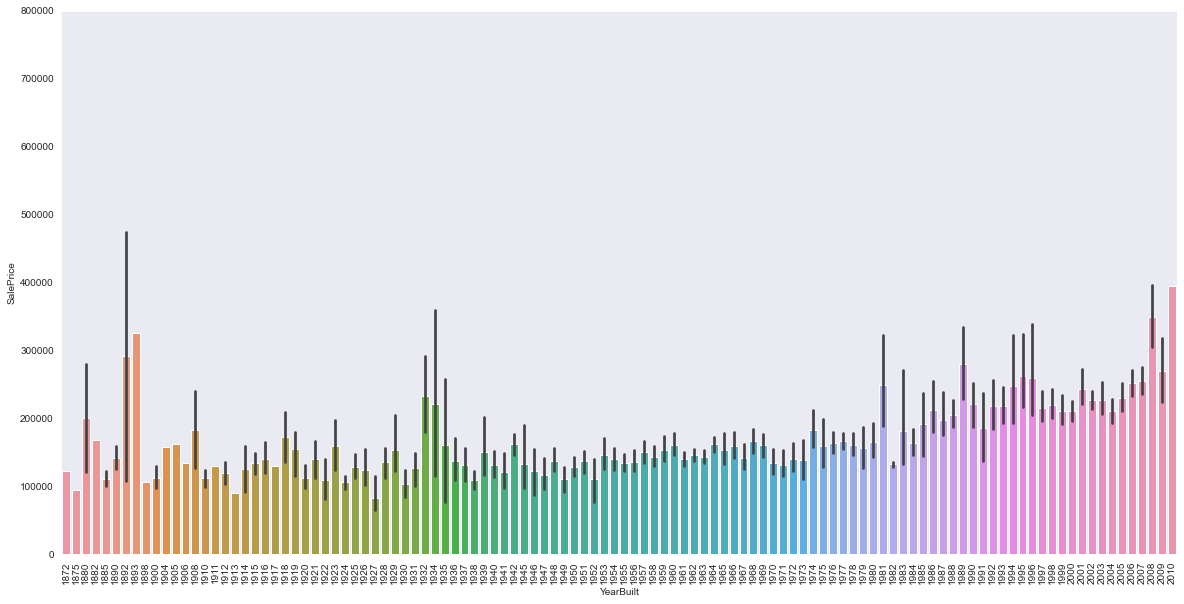

In [16]:
# YearBuilt to the SalePrice
data = pd.concat([hp_train['SalePrice'], hp_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.barplot( x=hp_train['YearBuilt'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

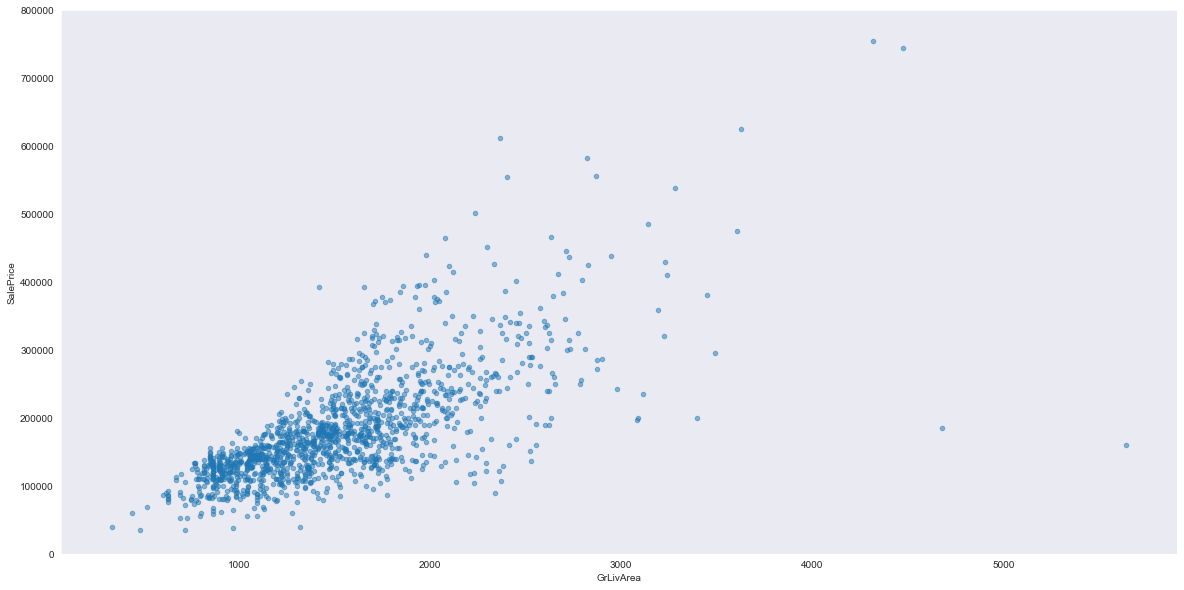

In [17]:
# Ground Living area(GrLivArea) To SalePrice

data = pd.concat([hp_train['SalePrice'], hp_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.5, ylim=(0,800000), figsize=(20, 10));

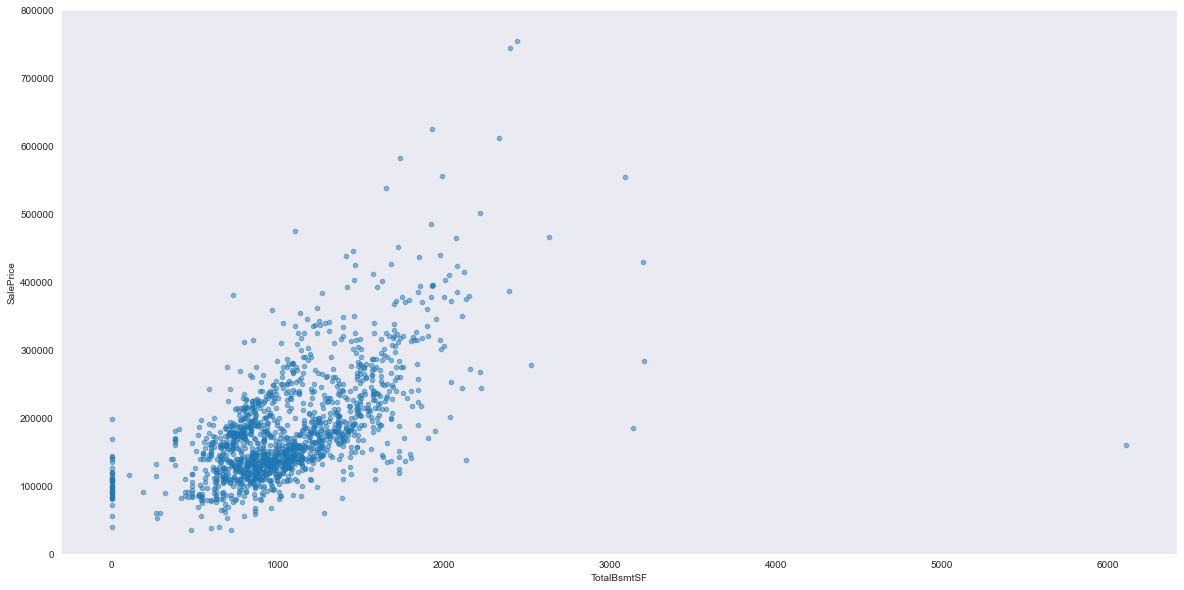

In [18]:
# Basement Surface Area(TotalBsmtSF) To SalePrice

data = pd.concat([hp_train['SalePrice'], hp_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', alpha=0.5, ylim=(0,800000), figsize=(20, 10));

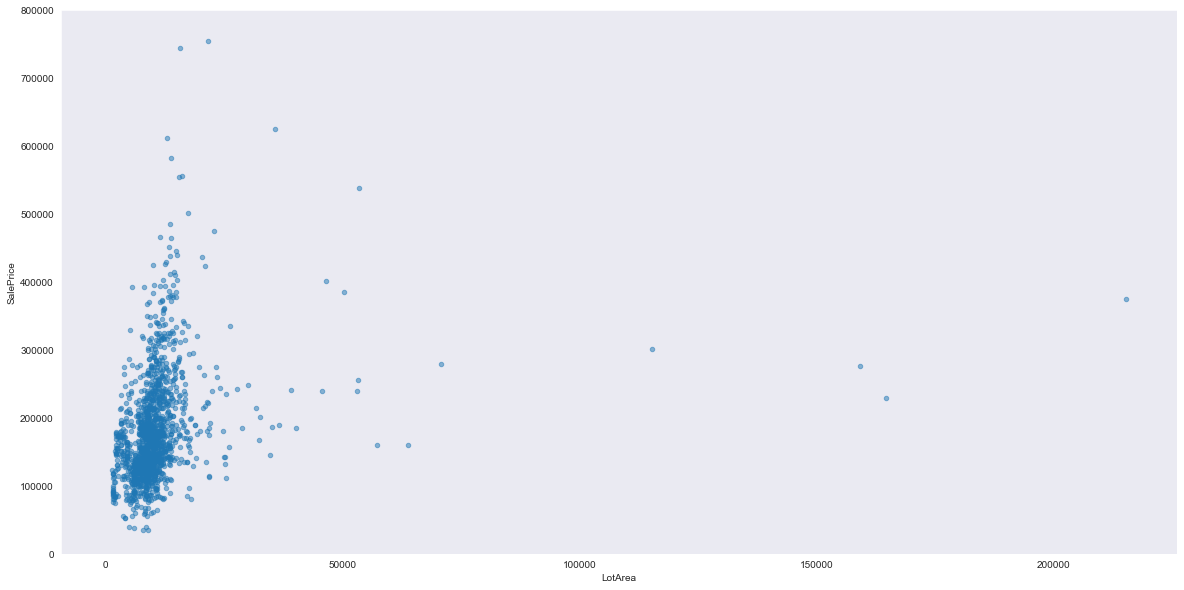

In [19]:
#LotArea To SalePrice

data = pd.concat([hp_train['SalePrice'], hp_train['LotArea']], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice', alpha=0.5, ylim=(0,800000), figsize=(20, 10));


# Feature Extraction/Engineering

Let's Handle Missing Values 

In [21]:
# Remove the Ids from train and test, as they are unique for each row and hence not useful for the model

train_ID = hp_train['Id']
test_ID = hp_test['Id']
hp_train.drop(['Id'], axis=1, inplace=True)
hp_test.drop(['Id'], axis=1, inplace=True)
hp_train.shape, hp_test.shape

((1460, 80), (1459, 79))

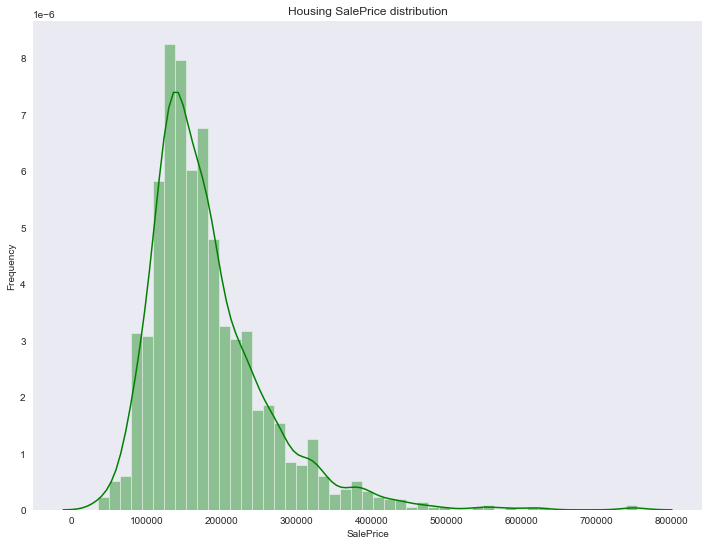

In [22]:
# Checking The Distribution of Train DataSet
sns.set_style("dark")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(hp_train['SalePrice'], color="green");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="Housing SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

We Can See our Distribution Set is left skewed so we can try to make it normal distribution Curve using log(1+x) to normalize the distribution

In [23]:
#log(1+x) transform
hp_train["SalePrice"] = np.log1p(hp_train["SalePrice"])


 mean = 12.02 and sigma = 0.40



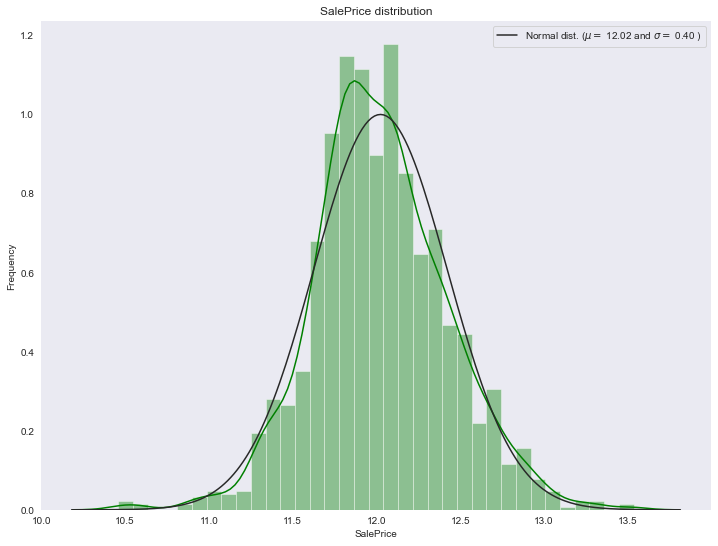

In [24]:
sns.set_style("dark")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 9))
#Check the new distribution 
sns.distplot(hp_train['SalePrice'] , fit=norm, color="green");

# Get the fitted parameters used by the function
(mean, sigma) = norm.fit(hp_train['SalePrice'])
print( '\n mean = {:.2f} and sigma = {:.2f}\n'.format(mean, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mean, sigma)],loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

The SalePrice Is distributed Normally.

In [25]:
# Remove the Outluiers.
hp_train.drop(hp_train[(hp_train['OverallQual']<5) & (hp_train['SalePrice']>200000)].index, inplace=True)
hp_train.drop(hp_train[(hp_train['GrLivArea']>4500) & (hp_train['SalePrice']<300000)].index, inplace=True)
hp_train.reset_index(drop=True, inplace=True)

In [26]:
hp_train.shape

(1458, 80)

In [27]:
# Split features and labels
hp_train_labels = hp_train['SalePrice'].reset_index(drop=True)
hp_train_features = hp_train.drop(['SalePrice'], axis=1)
hp_test_features = hp_test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
hp = pd.concat([hp_train_features, hp_test_features]).reset_index(drop=True)
hp.shape

(2917, 79)

## The Missing Value Handling By Filling the Average

In [28]:
cat_cols = hp.select_dtypes(['object']).columns
print("Categorical columns: ",cat_cols.tolist())

Categorical columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [29]:
(hp[cat_cols].isnull().sum())*100/hp.shape[0]

MSZoning          0.137127
Street            0.000000
Alley            93.212204
LotShape          0.000000
LandContour       0.000000
Utilities         0.068564
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034282
Exterior2nd       0.034282
MasVnrType        0.822763
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.776826
BsmtCond          2.811107
BsmtExposure      2.811107
BsmtFinType1      2.708262
BsmtFinType2      2.742544
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.034282
KitchenQual       0.034282
Functional        0.068564
FireplaceQu      48.680151
GarageType        5.382242
GarageFinish      5.450806
GarageQual        5.450806
GarageCond        5.450806
P

In [30]:
# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(hp)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('PoolQC', 99.69),
 ('MiscFeature', 96.4),
 ('Alley', 93.21),
 ('Fence', 80.43),
 ('FireplaceQu', 48.68),
 ('LotFrontage', 16.66),
 ('GarageYrBlt', 5.45),
 ('GarageFinish', 5.45),
 ('GarageQual', 5.45),
 ('GarageCond', 5.45)]

### Let's Visulalize The Missing Value

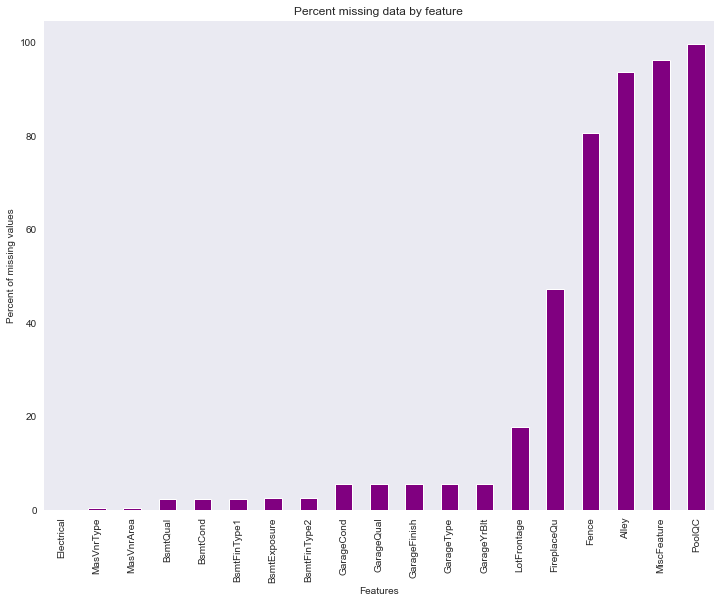

In [31]:
sns.set_style("dark")
f, ax = plt.subplots(figsize=(12, 9))
sns.set_color_codes(palette='deep')
missing = round(hp_train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="purple")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

### Imputing the rest Columns of Intrest

In [32]:
hp['Alley'] = np.where(hp['Alley'].isnull(),"No_Alley_Access",hp['Alley'])

hp['FireplaceQu'] = np.where(hp['FireplaceQu'].isnull(),"No_Fireplace",hp['FireplaceQu'])

hp['PoolQC'] = np.where(hp['PoolQC'].isnull(),"No_Pool",hp['PoolQC'])

hp['Fence'] = np.where(hp['Fence'].isnull(),"No_Fence",hp['Fence'])

hp['MiscFeature'] = np.where(hp['MiscFeature'].isnull(),"No_MiscFeature",hp['MiscFeature'])

hp['MSZoning'] = np.where(hp['MSZoning'].isnull(),"RL",hp['MSZoning'])

hp['Exterior1st'] = np.where(hp['Exterior1st'].isnull(),"VinylSd",hp['Exterior1st'])

hp['Exterior2nd'] = np.where(hp['Exterior2nd'].isnull(),"VinylSd",hp['Exterior2nd'])

hp['MasVnrType'] = np.where(hp['MasVnrType'].isnull(),"None",hp['MasVnrType'])

hp['BsmtQual'] = np.where(hp['BsmtQual'].isnull(),"None",hp['BsmtQual'])

hp['BsmtCond'] = np.where(hp['BsmtCond'].isnull(),"NoBasement",hp['BsmtCond'])

hp['BsmtExposure'] = np.where(hp['BsmtExposure'].isnull(),"NoBasement",hp['BsmtExposure'])

hp['BsmtFinType1'] = np.where(hp['BsmtFinType1'].isnull(),"NoBasement",hp['BsmtFinType1'])

hp['BsmtFinType2'] = np.where(hp['BsmtFinType2'].isnull(),"NoBasement",hp['BsmtFinType2'])

hp['Electrical'] = np.where(hp['Electrical'].isnull(),"SBrkr",hp['Electrical'])

hp['KitchenQual'] = np.where(hp['KitchenQual'].isnull(),"TA",hp['KitchenQual'])

hp['Functional'] = np.where(hp['Functional'].isnull(),"Typ",hp['Functional'])

hp['GarageType'] = np.where(hp['GarageType'].isnull(),"NoGarage",hp['GarageType'])

hp['GarageFinish'] = np.where(hp['GarageFinish'].isnull(),"NoGarage",hp['GarageFinish'])

hp['GarageQual'] = np.where(hp['GarageQual'].isnull(),"NoGarage",hp['GarageQual'])

hp['GarageCond'] = np.where(hp['GarageCond'].isnull(),"NoGarage",hp['GarageCond'])

hp['SaleType'] = np.where(hp['SaleType'].isnull(),"WD",hp['SaleType'])

hp['Utilities'] = np.where(hp['Utilities'].isnull(),"AllPub",hp['Utilities'])

In [33]:
# Lets check if all missing values are imputed for categorical column
cat_cols = hp.select_dtypes(['object']).columns
(hp[cat_cols].isnull().sum())*100/hp.shape[0]

MSZoning         0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolQC           0.0
Fence            0.0
MiscFeature      0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

In [34]:
hp.head()

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley LotShape  \
0          60       RL         65.0     8450   Pave  No_Alley_Access      Reg   
1          20       RL         80.0     9600   Pave  No_Alley_Access      Reg   
2          60       RL         68.0    11250   Pave  No_Alley_Access      IR1   
3          70       RL         60.0     9550   Pave  No_Alley_Access      IR1   
4          60       RL         84.0    14260   Pave  No_Alley_Access      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd             7    

In [35]:
# Some of the non-numeric predictors are stored as numbers; convert them into strings 
hp['MSSubClass'] = hp['MSSubClass'].apply(str)
hp['YrSold'] = hp['YrSold'].astype(str)
hp['MoSold'] = hp['MoSold'].astype(str)

In [37]:
def handle_missing(features):
    # the data description states that NA refers to typical ('Typ') values
    features['Functional'] = features['Functional'].fillna('Typ')
    # Replace the missing values in each of the columns below with their mode
    features['Electrical'] = features['Electrical'].fillna("SBrkr")
    features['KitchenQual'] = features['KitchenQual'].fillna("TA")
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # the data description stats that NA refers to "No Pool"
    features["PoolQC"] = features["PoolQC"].fillna("None")
    # Replacing the missing values with 0, since no garage = no cars in garage
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        features[col] = features[col].fillna(0)
    # Replacing the missing values with None
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        features[col] = features[col].fillna('None')
    # NaN values for these categorical basement features, means there's no basement
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        features[col] = features[col].fillna('None')
        
    # Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # We have no particular intuition around how to fill in the rest of the categorical features
    # So we replace their missing values with None
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # And we do the same thing for numerical features, but this time with 0s
    numeric_dtypes = ['int64', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

all_features = handle_missing(hp)

In [38]:
# Let's make sure we handled all the missing values
missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('MSSubClass', 0.0),
 ('MSZoning', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('Alley', 0.0),
 ('LotShape', 0.0),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', 0.0)]

In [39]:
# Fetch all numeric features
numeric_dtypes = ['int64', 'float64']
numeric = []
for i in hp.columns:
    if hp[i].dtype in numeric_dtypes:
        numeric.append(i)

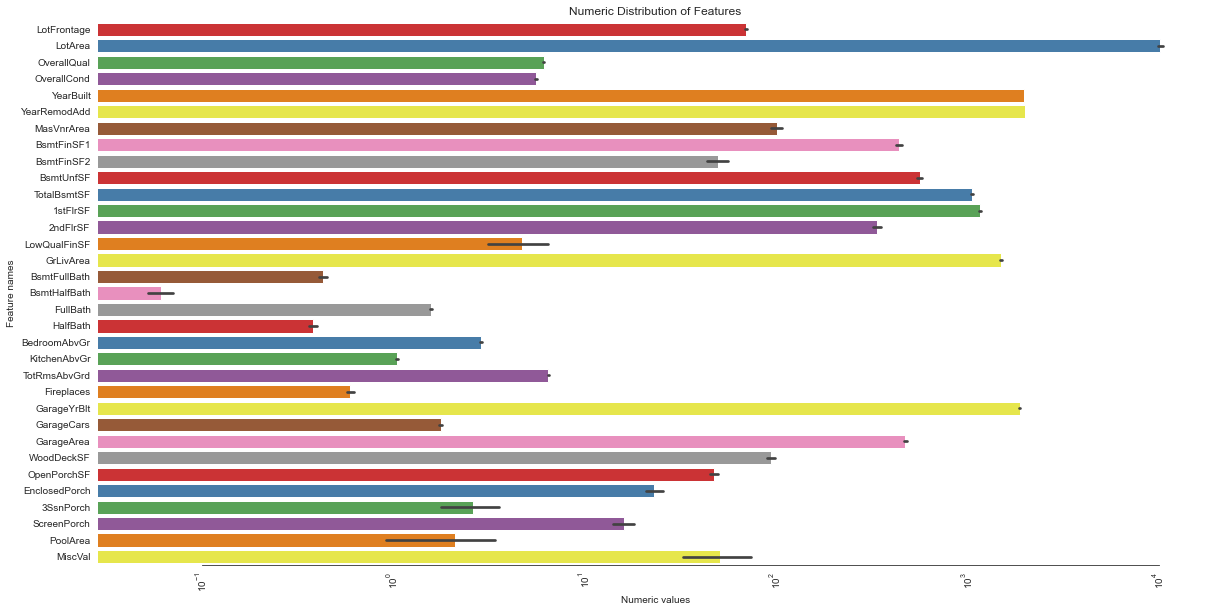

In [40]:
# Create bar charts for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 10))
ax.set_xscale("log")
ax = sns.barplot(data=hp[numeric],orient='h', palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
plt.xticks(rotation=90);
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [41]:
# Find skewed numerical features
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
dtype: float64

#### We use the scipy function boxcox1p which computes the Box-Cox transformation. The goal is to find a simple transformation that lets us normalize data

In [43]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [44]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

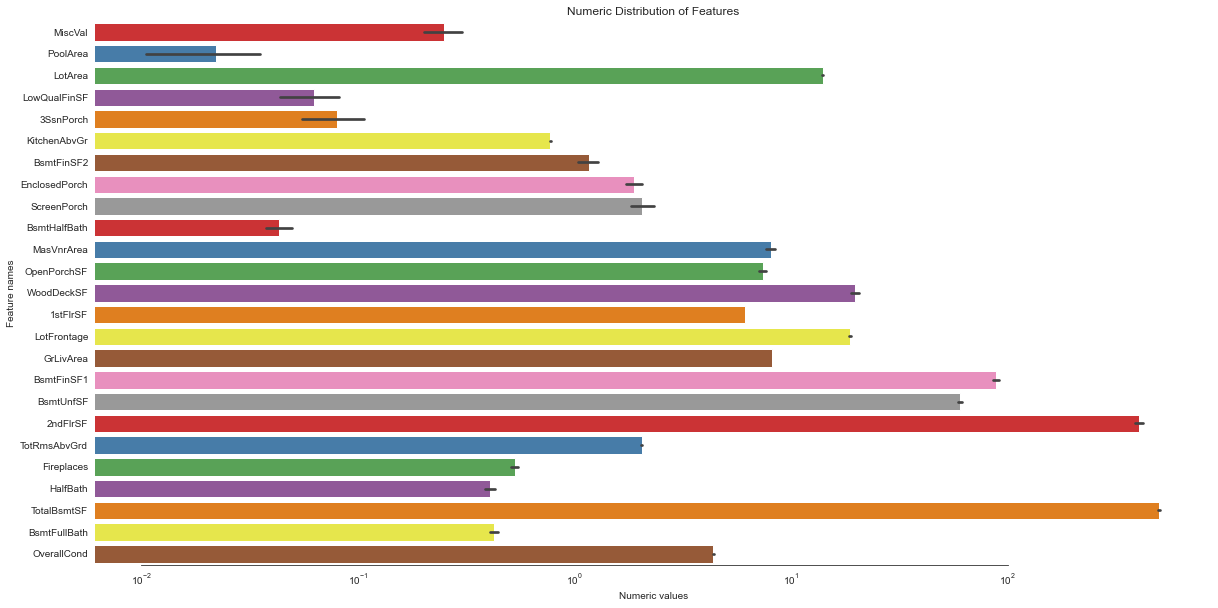

In [45]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 10))
ax.set_xscale("log")
ax = sns.barplot(data=hp[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

# Creating Features of Interest

Sometime ML models have trouble recognizing more complex patterns, so let's help our models out by creating a few features based on our intuition about the dataset, e.g. total area of floors, bathrooms and porch area of each house

In [46]:
hp['BsmtFinType1_Unf'] = 1*(hp['BsmtFinType1'] == 'Unf')
hp['HasWoodDeck'] = (hp['WoodDeckSF'] == 0) * 1
hp['HasOpenPorch'] = (hp['OpenPorchSF'] == 0) * 1
hp['HasEnclosedPorch'] = (hp['EnclosedPorch'] == 0) * 1
hp['Has3SsnPorch'] = (hp['3SsnPorch'] == 0) * 1
hp['HasScreenPorch'] = (hp['ScreenPorch'] == 0) * 1
hp['YearsSinceRemodel'] = hp['YrSold'].astype(int) - hp['YearRemodAdd'].astype(int)
hp['Total_Home_Quality'] = hp['OverallQual'] + all_features['OverallCond']
hp = hp.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
hp['TotalSF'] = hp['TotalBsmtSF'] + hp['1stFlrSF'] + hp['2ndFlrSF']
hp['YrBltAndRemod'] = hp['YearBuilt'] + hp['YearRemodAdd']

hp['Total_sqr_footage'] = (hp['BsmtFinSF1'] + hp['BsmtFinSF2'] +
                                hp['1stFlrSF'] + hp['2ndFlrSF'])
hp['Total_Bathrooms'] = (hp['FullBath'] + (0.5 * hp['HalfBath']) +
                               hp['BsmtFullBath'] + (0.5 * hp['BsmtHalfBath']))
hp['Total_porch_sf'] = (hp['OpenPorchSF'] + hp['3SsnPorch'] +
                              hp['EnclosedPorch'] + hp['ScreenPorch'] +
                              hp['WoodDeckSF'])
hp['TotalBsmtSF'] = hp['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
hp['2ndFlrSF'] = hp['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
hp['GarageArea'] = hp['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
hp['GarageCars'] = hp['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
hp['LotFrontage'] = hp['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
hp['MasVnrArea'] = hp['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
hp['BsmtFinSF1'] = hp['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

hp['haspool'] = hp['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
hp['has2ndfloor'] = hp['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
hp['hasgarage'] = hp['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
hp['hasbsmt'] = hp['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
hp['hasfireplace'] = hp['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# Feature Transformation

In [47]:
def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)   
        res.columns.values[m] = l + '_log'
        m += 1
    return res

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

hp = logs(hp, log_features)

In [48]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['YearRemodAdd', 'LotFrontage_log', 
              'TotalBsmtSF_log', '1stFlrSF_log', '2ndFlrSF_log', 'GrLivArea_log',
              'GarageCars_log', 'GarageArea_log']
hp = squares(hp, squared_features)

In [49]:
hp = pd.get_dummies(hp).reset_index(drop=True)
hp.shape

(2917, 379)

In [50]:
hp.head()

LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    18.144573  13.833053            7     3.991517       2003          2003   
1    20.673625  14.117917            6     6.000033       1976          1976   
2    18.668046  14.476511            7     3.991517       2001          2002   
3    17.249651  14.106195            7     3.991517       1915          1970   
4    21.314282  15.022007            8     3.991517       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0   19.433175  144.117870         0.0  29.991055   422.488483  5.939034   
1   54.598150  181.719196         0.0  44.135415   593.888138  6.234990   
2   17.768840  110.441039         0.0  56.896536   450.079687  5.994336   
3   54.598150   61.795317         0.0  64.808858   378.854544  6.027704   
4   25.404165  136.624608         0.0  61.166379   545.309891  6.161221   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1025.651859           0.0   8.353545       0.99344      0.000000         2   
1   665.141633           0.0   7.974695       0.00000      0.710895         2   
2  1040.520938           0.0   8.408065       0.99344      0.000000         2   
3   904.477319           0.0   8.358663       0.99344      0.000000         1   
4  1273.024709           0.0   8.669323       0.99344      0.000000         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  1.068837             3      0.750957      2.261968    0.000000   
1  0.000000             3      0.750957      1.996577    0.903334   
2  1.068837             3      0.750957      1.996577    0.903334   
3  0.000000             3      0.750957      2.137369    0.903334   
4  1.068837             4      0.750957      2.373753    0.903334   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0    0.000000    12.080309   
1       1976.0         2.0       460.0   56.184223     0.000000   
2       2001.0         2.0       608.0    0.000000     9.901081   
3       1998.0         3.0       642.0    0.000000     8.966116   
4       2000.0         3.0       836.0   42.245702    14.271569   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  BsmtFinType1_Unf  \
0        0.00000        0.0          0.0       0.0      0.0                 0   
1        0.00000        0.0          0.0       0.0      0.0                 0   
2        0.00000        0.0          0.0       0.0      0.0                 0   
3       16.02071        0.0          0.0       0.0      0.0                 0   
4        0.00000        0.0          0.0       0.0      0.0                 0   

   HasWoodDeck  HasOpenPorch  HasEnclosedPorch  Has3SsnPorch  HasScreenPorch  \
0            1             0                 1             1               1   
1            0             1                 1             1               1   
2            1             0                 1             1               1   
3            1             0                 0             1               1   
4            0             0                 1             1               1   

   YearsSinceRemodel  Total_Home_Quality      TotalSF  YrBltAndRemod  \
0                  5           10.991517  1454.079376           4006   
1                 31           12.000033   600.123129           3952   
2                  6           10.991517  1496.594961           4003   
3                 36           10.991517  1289.359567           3885   
4                  8           11.991517  1824.495821           4000   

   Total_sqr_footage  Total_Bathrooms  Total_porch_sf  haspool  has2ndfloor  \
0        1175.708763         3.527858       12.080309        0            1   
1         187.954187         2.355448       56.184223        0            1   
2        1156.956313         3.527858        9.901081        0            1   
3         972.300340         1.993440       24.98

In [51]:
# Remove any duplicated column names
hp = hp.loc[:,~hp.columns.duplicated()]

# Spliting The Training And Test Set

In [53]:
# Split features and labels
train_labels = hp_train['SalePrice'].reset_index(drop=True)

In [54]:
X = hp.iloc[:len(train_labels), :]
X_test = hp.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1458, 378), (1458,), (1459, 378))

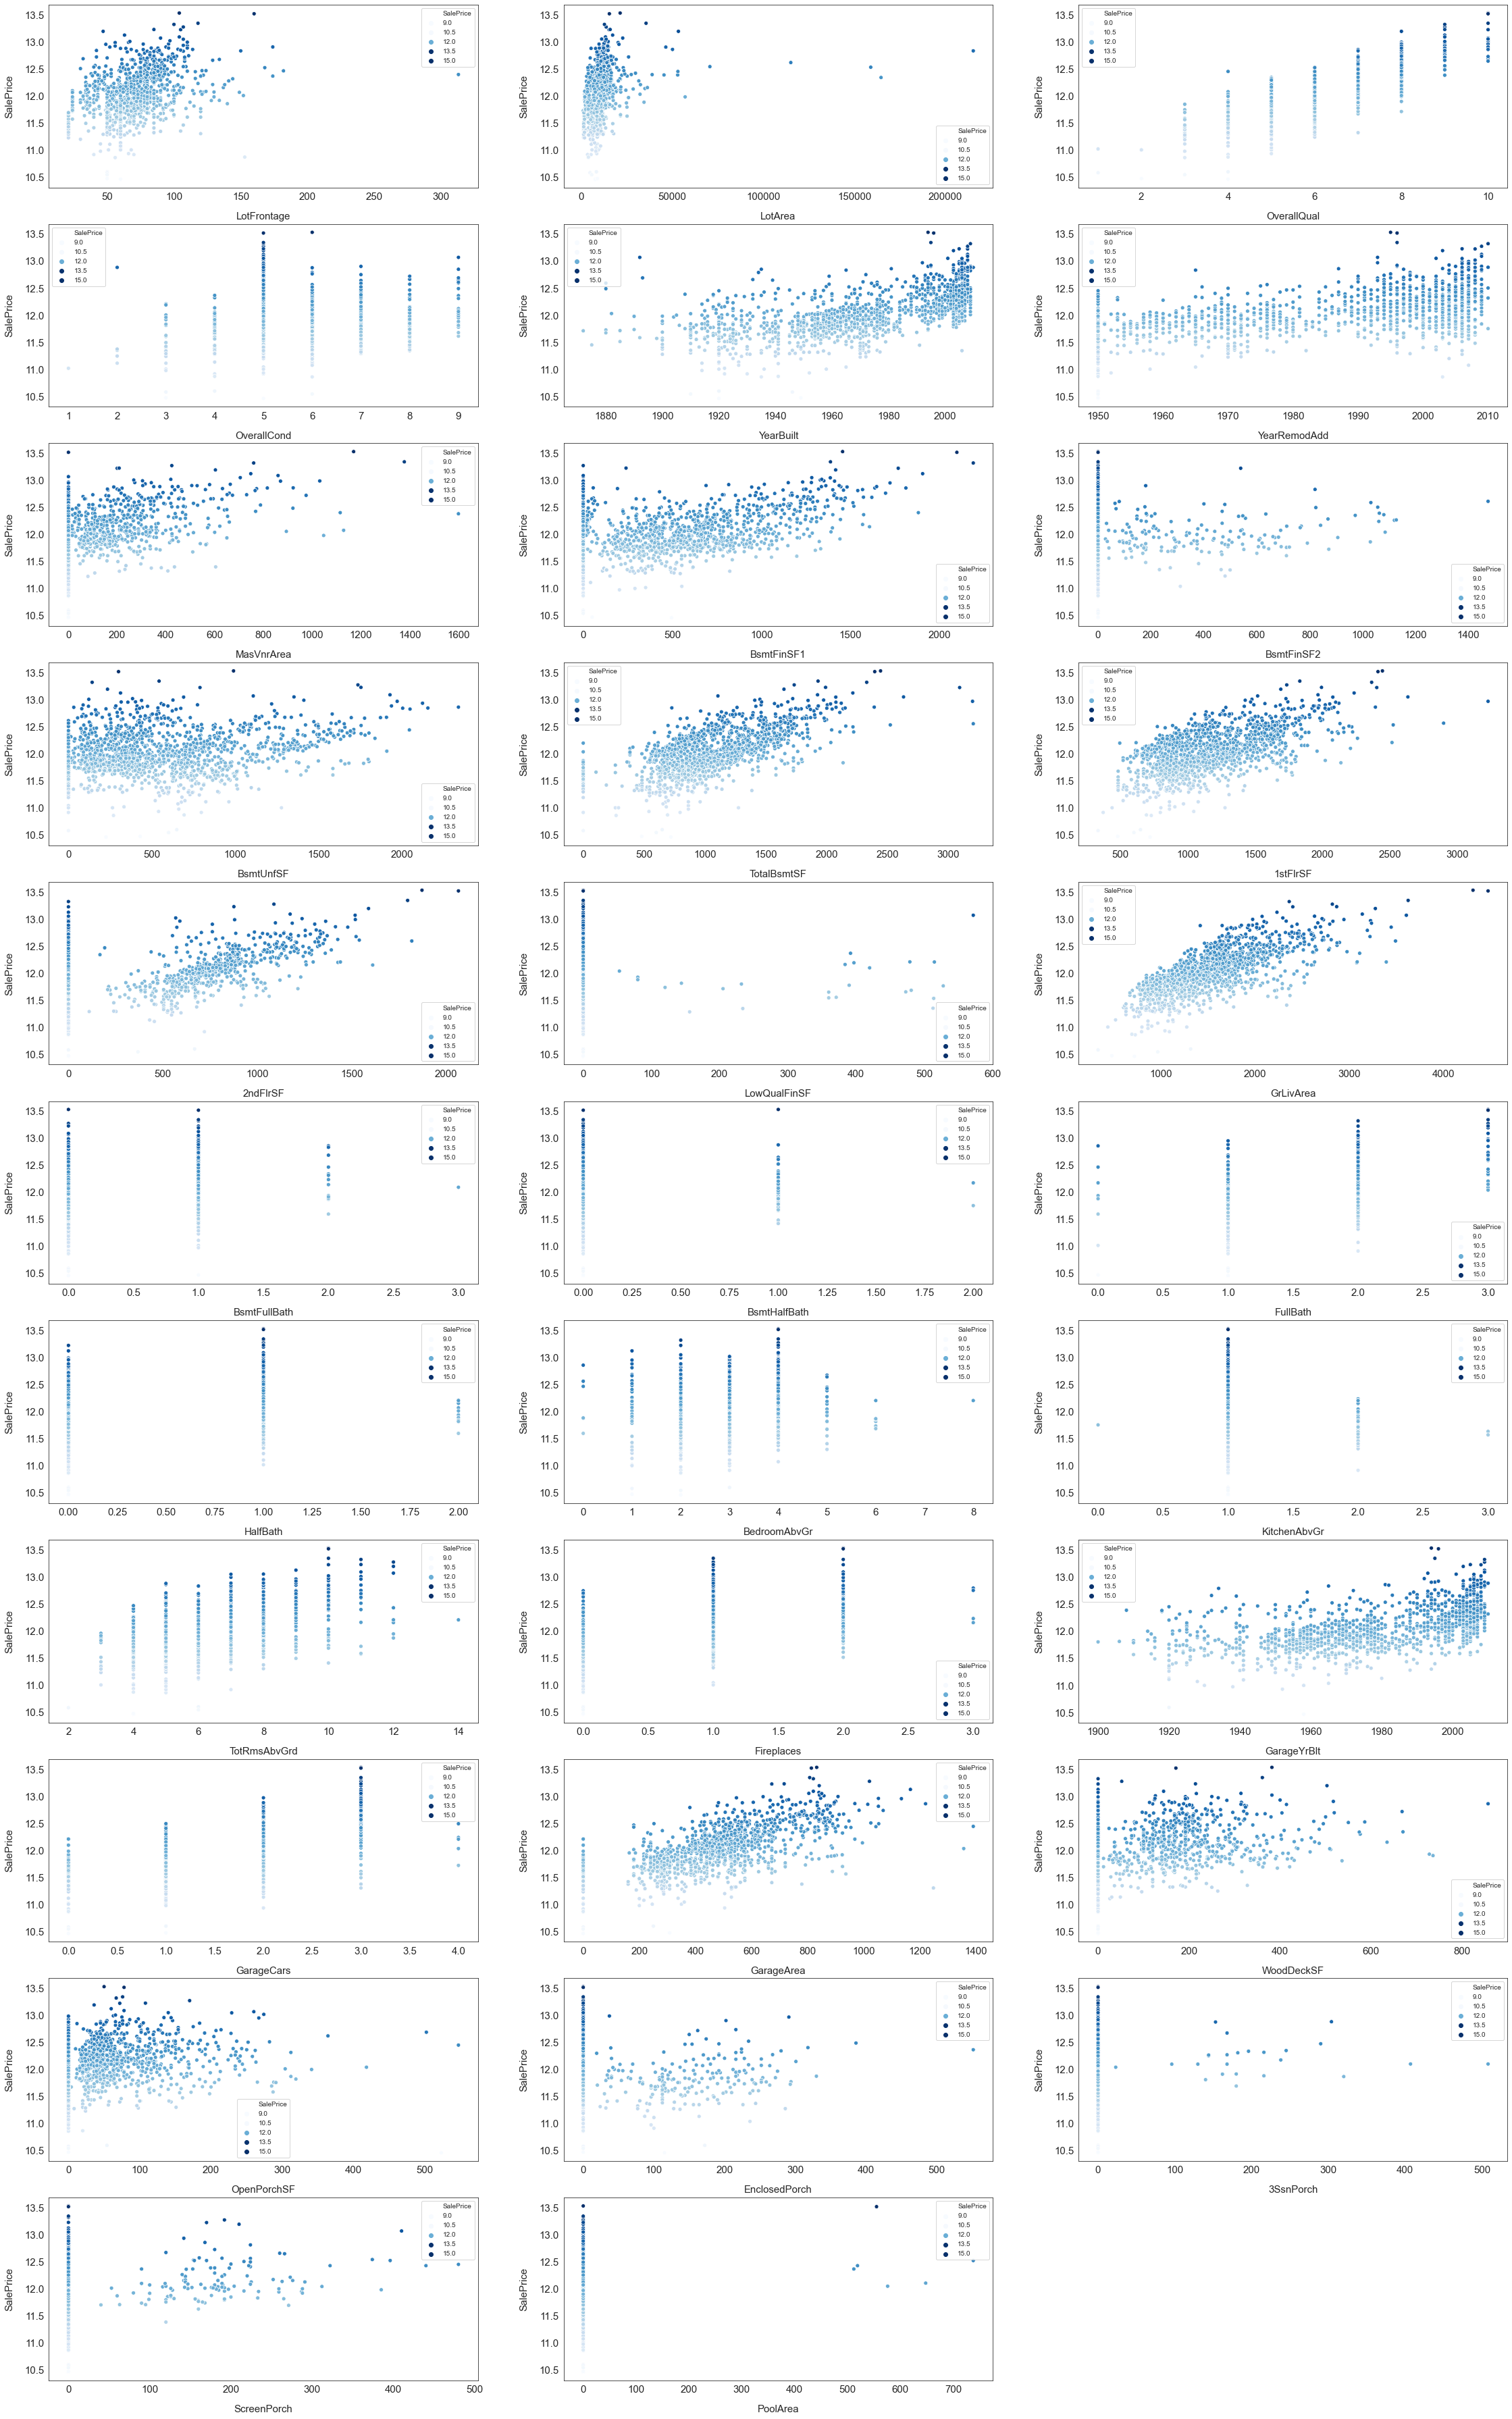

In [55]:
# Finding numeric features
numeric_dtypes = ['int64','float64']
numeric = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(16, 180))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(X[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=hp_train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=15)
    plt.ylabel('SalePrice', size=15, labelpad=15)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=15)
        plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()